In [51]:
import pandas as pd
import numpy as np

## CArgar los datos

In [52]:
# rutas
p1 = "D:/one_drive_unal/OneDrive - Universidad Nacional de Colombia/2025/prueba_JEP/Prueba_Tecnica/input/"
p2 = "C:/Users/IVAN CORREDOR/CODE_PYTHON/PRUEBA_GRAI/output/"

In [53]:
# cargar los datos
entidad_a = pd.read_excel(p1 + "A.xlsx",  decimal=",")
entidad_b = pd.read_excel(p1 + "B.xlsx",  decimal=",")

In [37]:
entidad_a.head()

,NOMBRE1,NOMBRE2,APELLIDO1,APELLIDO2,DEPARTAMENTO,MUNICIPIO,FECHA_HECHOS,COD_MUNICIPIO,NUMERO_DOCUMENTO,EDAD,SEXO
0,JOSE,JAVIER,HURTADO,VERGARA,CAQUETA,CARTAGENA DEL CHAIRA,1998-03-03,18150,10001293,22.0,HOMBRE
1,ISMAEL,ALBERTO,OROZCO,RAMIREZ,RISARALDA,PEREIRA,1996-08-08,66001,10001366,19.0,HOMBRE
2,CARLOS,ALFONSO,FLOREZ,NaN,CAQUETA,CARTAGENA DEL CHAIRA,1998-03-03,18150,10001916,21.0,MUJER
3,EFREM,NaN,SALDARRIAGA,NaN,ANTIOQUIA,PUERTO BERRIO,2004-06-01,5579,10004010,NaN,HOMBRE
4,JHON,JAIRO,RESTREPO,AGUILAR,ANTIOQUIA,URAMITA,2000-04-03,5842,10007592,25.0,HOMBRE


In [57]:
entidad_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NOMBRE1           10 non-null     object        
 1   NOMBRE2           9 non-null      object        
 2   APELLIDO1         10 non-null     object        
 3   APELLIDO2         7 non-null      object        
 4   DEPARTAMENTO      10 non-null     object        
 5   MUNICIPIO         10 non-null     object        
 6   FECHA_HECHOS      10 non-null     datetime64[ns]
 7   COD_MUNICIPIO     10 non-null     int64         
 8   NUMERO_DOCUMENTO  10 non-null     int64         
 9   EDAD              6 non-null      float64       
 10  SEXO              10 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 1012.0+ bytes


In [59]:
entidad_b.head()

,NOMBRE1,NOMBRE2,APELLIDO1,APELLIDO2,DEPARTAMENTO,MUNICIPIO,FECHA_HECHOS,COD_MUNICIPIO,NUMERO_DOCUMENTO,EDAD,SEXO
0,JOSE,JAVIER,HURTADO,VERGARA,CAQUETA,CARTAGENA DEL CHAIRA,1998-03-01,18150,10001293,22.0,HOMBRE
1,CARLOS,ALFONSO,LOPEZ,NaN,CAQUETA,LA MONTANITA,1998-03-01,18410,10001916,21.0,MUJER
2,CARLOS,ALFONSO,FLOREZ,NaN,CAQUETA,CARTAGENA DEL CHAIRA,1998-03-03,18150,10001916,21.0,MUJER
3,ALEXANDER,NaN,PORTELA,OZUNA,SUCRE,SAN ONOFRE,2000-11-08,70713,1000588161,NaN,HOMBRE
4,DIEGO,LEONARDO,GONZALEZ,RAMIREZ,ANTIOQUIA,COCORNA,2003-01-01,5197,1001663514,10.0,HOMBRE


In [61]:
entidad_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NOMBRE1           10 non-null     object        
 1   NOMBRE2           9 non-null      object        
 2   APELLIDO1         10 non-null     object        
 3   APELLIDO2         8 non-null      object        
 4   DEPARTAMENTO      10 non-null     object        
 5   MUNICIPIO         10 non-null     object        
 6   FECHA_HECHOS      10 non-null     datetime64[ns]
 7   COD_MUNICIPIO     10 non-null     int64         
 8   NUMERO_DOCUMENTO  10 non-null     int64         
 9   EDAD              9 non-null      float64       
 10  SEXO              10 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 1012.0+ bytes


## Crear variables y concatenar tablas

In [63]:
# crear variable FUENTE
entidad_a["FUENTE"] = "A"
entidad_b["FUENTE"] = "B"

In [65]:
# revisar duplicados
entidad_a.duplicated().sum()

0

In [67]:
# crear llave única en A
entidad_a["IDENTIFICADOR"] = entidad_a[['NOMBRE1', 'NOMBRE2', 'APELLIDO1', 'APELLIDO2', 'NUMERO_DOCUMENTO']].apply(
    #concatena las variables de indetificación y crea un valor de 4 digitos
    lambda row: 1000 + abs(hash('_'.join(row.dropna().astype(str)))) % 9000, axis=1
)

In [69]:
entidad_a.head()

,NOMBRE1,NOMBRE2,APELLIDO1,APELLIDO2,DEPARTAMENTO,MUNICIPIO,FECHA_HECHOS,COD_MUNICIPIO,NUMERO_DOCUMENTO,EDAD,SEXO,FUENTE,IDENTIFICADOR
0,JOSE,JAVIER,HURTADO,VERGARA,CAQUETA,CARTAGENA DEL CHAIRA,1998-03-03,18150,10001293,22.0,HOMBRE,A,2368
1,ISMAEL,ALBERTO,OROZCO,RAMIREZ,RISARALDA,PEREIRA,1996-08-08,66001,10001366,19.0,HOMBRE,A,2006
2,CARLOS,ALFONSO,FLOREZ,NaN,CAQUETA,CARTAGENA DEL CHAIRA,1998-03-03,18150,10001916,21.0,MUJER,A,4113
3,EFREM,NaN,SALDARRIAGA,NaN,ANTIOQUIA,PUERTO BERRIO,2004-06-01,5579,10004010,NaN,HOMBRE,A,5184
4,JHON,JAIRO,RESTREPO,AGUILAR,ANTIOQUIA,URAMITA,2000-04-03,5842,10007592,25.0,HOMBRE,A,1785


In [71]:
# crear llave única en B
entidad_b["IDENTIFICADOR"] = entidad_b[['NOMBRE1', 'NOMBRE2', 'APELLIDO1', 'APELLIDO2', 'NUMERO_DOCUMENTO']].apply(
    #concatena las variables de indetificación y crea un valor de 4 digitos
    lambda row: 1000 + abs(hash('_'.join(row.dropna().astype(str)))) % 9000, axis=1
)

In [89]:
## append
tabla_c = pd.concat([entidad_a, entidad_b], axis = 0).reset_index(drop=True)
tabla_c.tail()

,NOMBRE1,NOMBRE2,APELLIDO1,APELLIDO2,DEPARTAMENTO,MUNICIPIO,FECHA_HECHOS,COD_MUNICIPIO,NUMERO_DOCUMENTO,EDAD,SEXO,FUENTE,IDENTIFICADOR
15,NORBER,ADOLFO,PAMPLONA,CEBALLOS,ANTIOQUIA,SAN FRANCISCO,2006-07-26,5652,1001663707,16.0,HOMBRE,B,1518
16,EDUIN,YERLY,OSORIO,ARCILA,PUTUMAYO,PUERTO GUZMAN,2002-06-16,86571,1001707120,21.0,HOMBRE,B,7027
17,IASABEL,MILENA,CANEDA,OLIVERA,BOLIVAR,SAN JUAN NEPOMUCENO,2001-10-08,13657,1001812505,18.0,MUJER,B,3978
18,ROBERTO,CARLOS,CASTRO,ALBORNOZ,BOGOTA,BOGOTA,2006-10-19,11001,1020729768,20.0,HOMBRE,B,9251
19,JULIAN,CAMILO,HINCAPIE,HINCAPIE,RISARALDA,APIA,2002-03-07,66045,10031257,29.0,HOMBRE,B,6107


In [91]:
# revisar frecuencias
tabla_c["IDENTIFICADOR"].value_counts()

IDENTIFICADOR
2368    2
4113    2
9251    2
6107    2
2006    1
5184    1
1785    1
9497    1
6143    1
2083    1
7137    1
5709    1
2237    1
1518    1
7027    1
3978    1
Name: count, dtype: int64

## Generar reporte

In [77]:
# generar tabla resumen
resumen = tabla_c.groupby(["IDENTIFICADOR"])["FUENTE"].size().reset_index(name="CANTIDAD_FUENTES").sort_values(by="CANTIDAD_FUENTES", ascending =False).reset_index(drop=True)
resumen

,IDENTIFICADOR,CANTIDAD_FUENTES
0,2368,2
1,4113,2
2,6107,2
3,9251,2
4,1518,1
5,1785,1
6,2006,1
7,2083,1
8,2237,1
9,3978,1


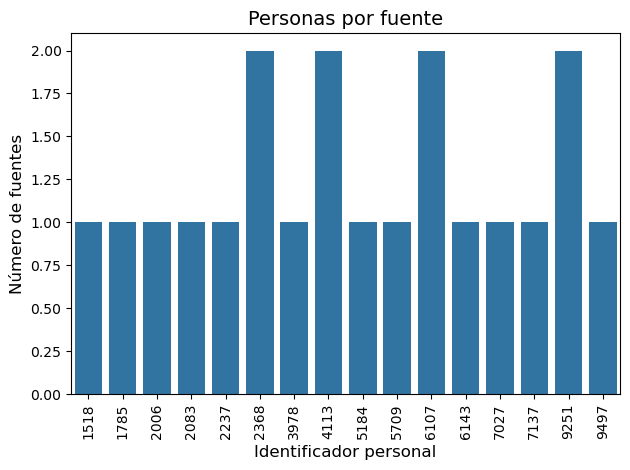

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generar la gráfica de barras
a = sns.countplot(x="IDENTIFICADOR", data= tabla_c)

# Configurar títulos y etiquetas
plt.xlabel("Identificador personal", fontsize=12)  # Título del eje X
plt.ylabel("Número de fuentes", fontsize=12)     # Título del eje Y
plt.title("Personas por fuente", fontsize=14)  # Título del gráfico

# Rotar etiquetas del eje X
plt.xticks(rotation=90, ha='center', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
# exportar la gráfica a pdf
plt.savefig(p1 + "personas_fuente.png")
plt.show()


In [184]:
tabla_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   NOMBRE1           20 non-null     object        
 1   NOMBRE2           18 non-null     object        
 2   APELLIDO1         20 non-null     object        
 3   APELLIDO2         15 non-null     object        
 4   DEPARTAMENTO      20 non-null     object        
 5   MUNICIPIO         20 non-null     object        
 6   FECHA_HECHOS      20 non-null     datetime64[ns]
 7   COD_MUNICIPIO     20 non-null     int64         
 8   NUMERO_DOCUMENTO  20 non-null     int64         
 9   EDAD              15 non-null     float64       
 10  SEXO              20 non-null     object        
 11  FUENTE            20 non-null     object        
 12  IDENTIFICADOR     20 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 2.2+ KB


# explicación de los resultados
Al combinar las fuentes A y B se obtiene un total de 20 rgistros. A nivel de personas, se identifican 16 personas únicas, de las cuales 4 se encuentran en las fuentes A y B. Los nombres de estas persona son: JOSE	JAVIER	HURTADO	VERGARA, CARLOS	ALFONSO	FLOREZ, ROBERTO	CARLOS	CASTRO	ALBORNOZ y JULIAN CAMILO HINCAPIEHINCAPIE.